In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from  sklearn import metrics 
import seaborn as sns
import random as rnd
%matplotlib inline

In [2]:
from matplotlib import style
style.use('fivethirtyeight')


In [3]:
df=pd.read_csv("file:///C:/Users/P4/Desktop/datacat.csv")

In [4]:
df.head()

,ad_id,xyzCampId,fbCampId,interest,impr,Clicks,Spent,conv,appConv,totConv,...,totConVal,CPM,costPerCon,ROAS,gender_F,gender_M,age_30-34,age_35-39,age_40-44,age_45-49
0,1121091,1178,144531,10,1194718,141,254.049996,28,14,42,...,1540,0.212644,6.048809,6.061799,0,1,1,0,0,0
1,1121092,1178,144531,10,637648,67,122.400000,13,5,18,...,565,0.191955,6.800000,4.616013,0,1,1,0,0,0
2,1121094,1178,144531,10,24362,0,0.000000,1,1,2,...,105,0.000000,0.000000,inf,0,1,1,0,0,0
3,1121095,1178,144531,10,459690,50,86.330001,5,2,7,...,225,0.187800,12.332857,2.606278,0,1,1,0,0,0
4,1121096,1178,144531,10,750060,86,161.909999,11,2,13,...,255,0.215863,12.454615,1.574949,0,1,1,0,0,0


In [5]:
df.columns

Index(['ad_id', 'xyzCampId', 'fbCampId', 'interest', 'impr', 'Clicks', 'Spent',
       'conv', 'appConv', 'totConv', 'appConVal', 'conVal', 'totConVal', 'CPM',
       'costPerCon', 'ROAS', 'gender_F', 'gender_M', 'age_30-34', 'age_35-39',
       'age_40-44', 'age_45-49'],
      dtype='object')

In [6]:
encoded=df[['ad_id', 'xyzCampId', 'fbCampId', 'interest', 'impr', 'Clicks', 'Spent',
       'conv', 'appConv', 'totConv', 'appConVal', 'conVal', 'totConVal', 'CPM',
       'costPerCon', 'ROAS', 'gender_F', 'gender_M', 'age_30-34', 'age_35-39',
       'age_40-44', 'age_45-49']].apply(LabelEncoder().fit_transform)

In [7]:
data =pd.concat([encoded], axis=1)

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data)
df_normalized = pd.DataFrame(x_scaled)

C:\Users\P4\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
data= data.rename(columns={'ROAS': 'Category'})
data.Category[data.Category == 2] = 0

In [10]:
data.Category.value_counts()

610    12
0       5
608     1
200     1
207     1
206     1
205     1
204     1
203     1
202     1
201     1
199     1
607     1
198     1
197     1
196     1
195     1
194     1
193     1
192     1
208     1
209     1
210     1
211     1
226     1
225     1
224     1
223     1
222     1
221     1
       ..
392     1
391     1
390     1
389     1
388     1
387     1
386     1
385     1
384     1
383     1
398     1
400     1
417     1
401     1
416     1
415     1
414     1
413     1
412     1
411     1
410     1
409     1
408     1
407     1
406     1
405     1
404     1
403     1
402     1
305     1
Name: Category, Length: 610, dtype: int64

In [11]:
# Pour plus de commodité, divisez la  dataframe,data en deux étiquettes.

nor_obs = data.loc[data.Category==0]    #Data frame  avec observation normale
ano_obs = data.loc[data.Category==1]    #Data frame avec observation anormale

In [12]:
nor_obs

,ad_id,xyzCampId,fbCampId,interest,impr,Clicks,Spent,conv,appConv,totConv,...,totConVal,CPM,costPerCon,Category,gender_F,gender_M,age_30-34,age_35-39,age_40-44,age_45-49
137,137,0,35,12,441,59,422,0,0,0,...,0,361,610,0,0,1,0,1,0,0
348,348,0,109,15,12,1,5,0,0,0,...,0,45,610,0,1,0,1,0,0,0
463,463,0,154,19,413,78,438,0,0,0,...,0,536,610,0,1,0,0,0,1,0
472,472,0,160,1,69,12,118,0,0,0,...,0,596,610,0,1,0,0,0,1,0
481,481,0,164,4,570,151,575,1,0,1,...,1,491,608,0,1,0,0,0,0,1


In [13]:
ano_obs

,ad_id,xyzCampId,fbCampId,interest,impr,Clicks,Spent,conv,appConv,totConv,...,totConVal,CPM,costPerCon,Category,gender_F,gender_M,age_30-34,age_35-39,age_40-44,age_45-49
485,485,0,165,5,566,161,586,1,0,1,...,1,581,609,1,1,0,0,0,0,1


In [14]:
#La data frame data est divisée en trois ensembles

#Training set: train_features

#Test observations/features: X_test

#Test labels: Y_test: Y_test

#Une fois que la classe SVM est formée aux observations d’une seule classe. Dans ce cas, l'algorithme est entraîné avec 200 000 premières observations de transactions normales. Les observations restantes sont fusionnées avec l'observation anormale pour créer un ensemble de test.

In [15]:
train_feature = nor_obs.loc[:200000, ]
train_feature = train_feature.drop('Category', 1)
Y_1 = nor_obs.loc[:200000, 'Category']
Y_2 = ano_obs['Category']

In [16]:
X_test_1 = nor_obs.loc[:200000, ].drop('Category',1)
X_test_2 = ano_obs.drop('Category',1)
X_test = X_test_1.append(X_test_2)

In [17]:
train_feature

,ad_id,xyzCampId,fbCampId,interest,impr,Clicks,Spent,conv,appConv,totConv,...,conVal,totConVal,CPM,costPerCon,gender_F,gender_M,age_30-34,age_35-39,age_40-44,age_45-49
137,137,0,35,12,441,59,422,0,0,0,...,0,0,361,610,0,1,0,1,0,0
348,348,0,109,15,12,1,5,0,0,0,...,0,0,45,610,1,0,1,0,0,0
463,463,0,154,19,413,78,438,0,0,0,...,0,0,536,610,1,0,0,0,1,0
472,472,0,160,1,69,12,118,0,0,0,...,0,0,596,610,1,0,0,0,1,0
481,481,0,164,4,570,151,575,1,0,1,...,1,1,491,608,1,0,0,0,0,1


In [18]:
#train_feature :est une observation normal

In [19]:
X_test

,ad_id,xyzCampId,fbCampId,interest,impr,Clicks,Spent,conv,appConv,totConv,...,conVal,totConVal,CPM,costPerCon,gender_F,gender_M,age_30-34,age_35-39,age_40-44,age_45-49
137,137,0,35,12,441,59,422,0,0,0,...,0,0,361,610,0,1,0,1,0,0
348,348,0,109,15,12,1,5,0,0,0,...,0,0,45,610,1,0,1,0,0,0
463,463,0,154,19,413,78,438,0,0,0,...,0,0,536,610,1,0,0,0,1,0
472,472,0,160,1,69,12,118,0,0,0,...,0,0,596,610,1,0,0,0,1,0
481,481,0,164,4,570,151,575,1,0,1,...,1,1,491,608,1,0,0,0,0,1
485,485,0,165,5,566,161,586,1,0,1,...,1,1,581,609,1,0,0,0,0,1


In [20]:
#X_test: a des observations normal et anomales

In [21]:
#Machines learning avec le model de classification SVM oneclass

from sklearn import svm
oneclass = svm.OneClassSVM(kernel='linear', gamma=0.0001, nu=0.95)

Y_1 = nor_obs.loc[:200000, 'Category']
Y_2 = ano_obs['Category']

Y_test= Y_1.append(Y_2)

In [22]:
Y_test

137    0
348    0
463    0
472    0
481    0
485    1
Name: Category, dtype: int32

In [23]:
#y_test nous indique que le numero 485 est une anomalie
#en conclusion on a une seule anomalie dans la la dataset qui est 485

In [24]:
oneclass.fit(train_feature)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.0001,
      kernel='linear', max_iter=-1, nu=0.95, random_state=None,
      shrinking=True, tol=0.001, verbose=False)

In [25]:
anomali_pred = oneclass.predict(X_test)

In [26]:
anomali_pred

array([-1, -1, -1, -1, -1,  1], dtype=int32)

In [27]:
unique, counts = np.unique(anomali_pred, return_counts=True)
print (np.asarray((unique, counts)).T)

[[-1  5]
 [ 1  1]]


In [28]:
Y_test= Y_test.to_frame()
Y_test=Y_test.reset_index()
anomali_pred = pd.DataFrame(anomali_pred)
anomali_pred= anomali_pred.rename(columns={0: 'prediction'})

In [29]:
anomali_pred[anomali_pred['prediction']==1]=0
anomali_pred[anomali_pred['prediction']==-1]=1

In [30]:

print(anomali_pred['prediction'].value_counts())
print(sum(anomali_pred['prediction'])/anomali_pred['prediction'].shape[0])

1    5
0    1
Name: prediction, dtype: int64
0.8333333333333334


In [31]:
print(Y_test['Category'].value_counts())
sum(Y_test['Category'])/Y_test['Category'].shape[0]
 

0    5
1    1
Name: Category, dtype: int64


0.16666666666666666

In [32]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate,  thresholds = roc_curve(Y_test['Category'],anomali_pred['prediction'])
roc_auc=auc(true_positive_rate,false_positive_rate)
print("true_positive_rate- ", true_positive_rate)
print("false_positive_rate- ", false_positive_rate)
print("roc_auc- ", roc_auc)

true_positive_rate-  [0. 0. 1.]
false_positive_rate-  [0. 1. 1.]
roc_auc-  1.0


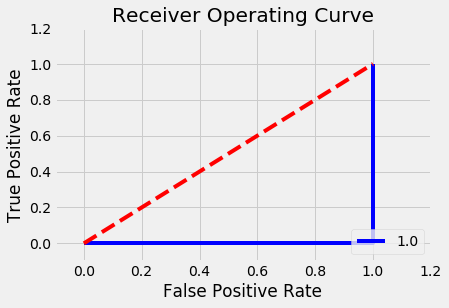

In [33]:
plt.title("Receiver Operating Curve")
plt.plot(false_positive_rate,true_positive_rate,'b',label=roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:

TP = FN = FP = TN = 0
for j in range(len(Y_test)):
    if Y_test['Category'][j]== 0 and anomali_pred['prediction'][j] == 1:
        TP = TP+1
    elif Y_test['Category'][j]== 0 and anomali_pred['prediction'][j] == -1:
        FN = FN+1
    elif Y_test['Category'][j]== 1 and anomali_pred['prediction'][j] == 1:
        FP = FP+1
    else:
        TN = TN +1
print (TP,  FN,  FP,  TN)

5 0 0 1


In [38]:
accuracy = (TP+TN)/(TP+FN+FP+TN)
print (accuracy)
sensitivity = TP/(TP+FN)
print (sensitivity)
specificity = TN/(TN+FP)
print (specificity)

1.0
1.0
1.0
